# Figures

In [4]:
from functools import partial
import palettable
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import data_utils as data
from plotting_utils import remove_spines, save_figure

/Users/ocsicnarf/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [5]:
reload(data)

<module 'data_utils' from 'data_utils.pyc'>

## Setup

In [6]:
%matplotlib inline
SET1_COLORS     = palettable.colorbrewer.qualitative.Set1_9.mpl_colors
DARK2_COLORS    = palettable.colorbrewer.qualitative.Dark2_8.mpl_colors
PAIRED12_COLORS = palettable.colorbrewer.qualitative.Paired_12.mpl_colors

In [7]:
save_fig = partial(save_figure, folder=os.path.join('possible-poster-figures'), exts=['pdf', 'png'])

In [8]:
CATEGORY2LABEL = {
  'VT': 'Vaccine types',
  'VRT': 'Vaccine-related types',
  'NVT': 'Other non-vaccine types'
}

## Get Data

#### Real Data

In [9]:
PROJECT_DIR = '/Users/ocsicnarf/Github/Pneumo-Model'

In [10]:
SEROTYPES = data.read_json('serotypes', PROJECT_DIR, 'configuration', 'serotypes_sparc2.json')
PCV7 = ["4", "6A", "6B", "9V", "14", "18C", "19F", "23F"]
get_category = data.get_categorizer(PCV7)
SEROCATEGORIES = pd.Series(get_category(SEROTYPES), index=SEROTYPES)

In [11]:
reload(data)

<module 'data_utils' from 'data_utils.pyc'>

In [12]:
df_2001 = data.get_observed_data('{}/configuration/observed_counts_sparc2_2001.json'.format(PROJECT_DIR), SEROTYPES, 2001)
df_2009 = data.get_observed_data('{}/configuration/observed_counts_sparc2_2009.json'.format(PROJECT_DIR), SEROTYPES, 2009)

In [13]:
DF_OBSERVED = df_2001.join(df_2009)
DF_OBSERVED.head()

,num_colonized_2001,prev_point_2001,prev_lower_2001,prev_upper_2001,num_colonized_2009,prev_point_2009,prev_lower_2009,prev_upper_2009
category,,,,,,,,
10,3,0.005357,0.001106,0.015575,10,0.011455,0.005506,0.020965
11A,9,0.016071,0.007375,0.030289,16,0.018328,0.010511,0.029593
13,0,0.000000,0.000000,0.006566,1,0.001145,0.000029,0.006365
14,4,0.007143,0.001950,0.018187,1,0.001145,0.000029,0.006365
15A,1,0.001786,0.000045,0.009909,11,0.012600,0.006306,0.022433


#### Simulated Data

In [14]:
reload(data)

<module 'data_utils' from 'data_utils.pyc'>

In [12]:
%%time
# 150 = 2001
# 158 = 2009

years = [145, 150, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169]
df_strong_sg = data.get_simulated_data('{}/outputs/simulate-us-isppd-0.3-sg'.format(PROJECT_DIR), SEROTYPES, years, 'strong_sg')

CPU times: user 15.1 s, sys: 921 ms, total: 16 s
Wall time: 37 s


In [13]:
%%time
df_medium_sg = data.get_simulated_data('{}/outputs/simulate-us-isppd-0.2-sg'.format(PROJECT_DIR), SEROTYPES, years, 'medium_sg')

CPU times: user 14.6 s, sys: 875 ms, total: 15.5 s
Wall time: 37.2 s


In [14]:
%%time
df_short = data.get_simulated_data('{}/outputs/simulate-us-isppd-no-sg-150-max-duration'.format(PROJECT_DIR), SEROTYPES, years, 'short')

CPU times: user 16 s, sys: 914 ms, total: 16.9 s
Wall time: 39.6 s


In [15]:
%%time
df_strong_sg_short = data.get_simulated_data('{}/outputs/simulate-us-isppd-0.3-sg-150-max-duration'.format(PROJECT_DIR), SEROTYPES, years, 'strong_sg_and_short')

CPU times: user 5.01 s, sys: 271 ms, total: 5.28 s
Wall time: 13.2 s


In [16]:
%%time
df_medium_sg_short = data.get_simulated_data('{}/outputs/simulate-us-isppd-0.2-sg-150-max-duration'.format(PROJECT_DIR), SEROTYPES, years, 'medium_sg_and_shdf_medium_sg)

CPU times: user 10 s, sys: 524 ms, total: 10.6 s
Wall time: 25.1 s


In [25]:
DF_SIMULATED = df_strong_sg.join([df_medium_sg, df_strong_sg_short, df_medium_sg_short, df_short])
DF_SIMULATED.head()

,prev_145_strong_sg,prev_150_strong_sg,prev_158_strong_sg,prev_159_strong_sg,prev_160_strong_sg,prev_161_strong_sg,prev_162_strong_sg,prev_163_strong_sg,prev_164_strong_sg,prev_165_strong_sg,...,prev_160_short,prev_161_short,prev_162_short,prev_163_short,prev_164_short,prev_165_short,prev_166_short,prev_167_short,prev_168_short,prev_169_short
10,"[0.00460095071371, 0.00447869731278, 0.0024363...","[0.00479183337791, 0.00470873133324, 0.0025760...","[0.00910419989367, 0.00576175800616, 0.0099955...","[0.00937827911857, 0.0069362083498, 0.00950477...","[0.0135427624602, 0.00646627383475, 0.01105808...","[0.0147265183804, 0.00656552169284, 0.01359471...","[0.0106121447721, 0.00779675821288, 0.01325158...","[0.0108414627624, 0.00512579908676, 0.01577920...","[0.0101796587216, 0.00349287858302, 0.01447156...","[0.0107924878837, 0.00411136345355, 0.01359711...",...,"[0.00385682604676, 0.00934975230955, 0.0081006...","[0.00563225904011, 0.00746673907141, 0.0027726...","[0.00389490361764, 0.00914982822592, 0.0050430...","[0.00179856115108, 0.0112933053259, 0.00390832...","[0.00165147311402, 0.013356906446, 0.003809774...","[0.00274846042216, 0.00942644715879, 0.0066373...","[0.00289131291891, 0.00932277044855, 0.0155170...","[0.0014993160471, 0.00791765637371, 0.02396064...","[0.000262363898728, 0.00586854460094, 0.024233...","[0.000330076577766, 0.00690938081318, 0.020161..."
11A,"[0.0162043226501, 0.0140612876824, 0.012679946...","[0.0110546442899, 0.0108300820665, 0.017699307...","[0.0193602604997, 0.0236276698379, 0.022562047...","[0.026243887723, 0.0223780719083, 0.0267599333...","[0.0307529162248, 0.030212751589, 0.0325916375...","[0.0368939797549, 0.0310531274953, 0.036461126...","[0.0440795442359, 0.0416447568988, 0.039578942...","[0.0444689530686, 0.0416778538813, 0.039859311...","[0.043077383532, 0.032990805841, 0.04087110014...","[0.0415320409262, 0.0318854135943, 0.039330674...",...,"[0.0411548540483, 0.0256839335922, 0.025750790...","[0.0355906245891, 0.0253416508281, 0.024766741...","[0.0343939794032, 0.0230635289268, 0.024571221...","[0.033062430056, 0.0354609838732, 0.0216834525...","[0.0378847932356, 0.0454646603497, 0.022420730...","[0.0346415963061, 0.0555739511418, 0.022055281...","[0.0279055460639, 0.0474934036939, 0.029307631...","[0.0249371477709, 0.042084547374, 0.0318130218...","[0.0286523153614, 0.0437961099933, 0.032009331...","[0.031566318986, 0.0351226813712, 0.0355403448..."
13,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.000133493525564, 0...","[0.0, 0.0, 6.66222518321e-05, 0.0, 0.0, 0.0, 0...","[0.0, 0.000133994372236, 0.0, 0.0, 0.0, 0.0, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.000132555673383, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001327668613...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000...","[0.0, 6.5703022339e-05, 0.0, 0.0, 0.0, 0.0, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.328...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000...",...,"[0.0, 0.0, 0.0, 0.0, 6.623393827e-05, 0.000201...","[0.0, 0.000135758892207, 0.000132030631106, 0....","[0.000132030631106, 0.0, 0.0, 0.00013257324671...","[0.000133226751932, 0.0, 0.0, 0.0, 0.000260314...","[0.0, 0.0, 0.0, 0.000130429111778, 0.0, 6.6613...","[0.0, 0.000132766861391, 0.0, 0.00013210039630...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00020369...","[0.0, 0.0, 0.0, 0.000198176773682, 0.0, 0.0, 0...","[0.0, 0.0, 0.000130872922392, 0.0, 0.000132187...","[0.0, 0.0, 0.0, 0.000132714001327, 0.000264515..."
14,"[0.00849492324266, 0.00495611785568, 0.0072425...","[0.0110323522332, 0.0117045607426, 0.006306906...","[0.000797448165869, 0.000669971861182, 0.00070...","[0.000393494228751, 0.000263400500461, 0.00013...","[0.000397667020148, 0.000132415254237, 0.0, 0....","[0.0, 0.000532339632686, 0.000268096514745, 0....","[0.0, 0.000262812089356, 0.000131856540084, 0....","[0.000133707714935, 0.000134300295461, 0.00012...","[0.000406283856988, 0.0, 0.000129886998311, 0....","[0.000134625740442, 0.000268132457434, 0.

In [26]:
DF = DF_OBSERVED.join(DF_SIMULATED, lsuffix='_left')
DF['category'] = get_category(DF.index)
DF.index.rename('serotype', inplace=True)
DF.sort_values(by=['category', 'prev_point_2001'], ascending=False, inplace=True)
DF.head(5)

,num_colonized_2001,prev_point_2001,prev_lower_2001,prev_upper_2001,num_colonized_2009,prev_point_2009,prev_lower_2009,prev_upper_2009,prev_145_strong_sg,prev_150_strong_sg,...,prev_161_short,prev_162_short,prev_163_short,prev_164_short,prev_165_short,prev_166_short,prev_167_short,prev_168_short,prev_169_short,category
serotype,,,,,,,,,,,,,,,,,,,,,
6A,22,0.039286,0.024781,0.058877,3,0.003436,0.000709,0.010010,"[0.046570616752, 0.0399217842041, 0.0571096744...","[0.0530779219043, 0.0408538409794, 0.051676655...",...,"[0.000131492439185, 0.00054303556883, 0.000264...","[0.000264061262213, 0.000137419266181, 0.00013...","[0.0, 0.000880878167773, 0.000463698993111, 0....","[0.000132117849121, 0.000400373682103, 0.00013...","[0.000527704485488, 0.000398300584174, 0.00104...","[0.0, 0.0, 0.000655651717808, 0.00225016545334...","[0.000661463156502, 0.000131960939562, 0.00058...","[0.00104945559491, 0.000134138162307, 0.001352...","[0.000528122524426, 0.0, 0.0, 0.0, 0.001190318...",VT
23F,13,0.023214,0.012417,0.039370,0,0.000000,0.000000,0.004217,"[0.0280545785079, 0.0228254399127, 0.026135122...","[0.0234465498796, 0.0223552670523, 0.028347781...",...,"[0.000131492439185, 0.000203638338311, 0.00026...","[0.000264061262213, 0.0, 0.000266595574513, 0....","[0.000666133759659, 0.0, 0.0, 0.00013180440226...","[0.000198176773682, 0.000645046042973, 0.00085...","[0.000131926121372, 4.42555762082e-05, 0.00150...","[0.0, 0.000593667546174, 0.000240405586153, 0....","[0.000264585262601, 0.000791765637371, 0.0, 0....","[0.000983864620228, 0.000402414486922, 0.0, 0....","[0.000638147610246, 0.00046505447781, 0.000197...",VT
19F,12,0.021429,0.011120,0.037132,2,0.002291,0.000278,0.008251,"[0.0158452194991, 0.0254853771655, 0.022945727...","[0.0161585049478, 0.0295080452038, 0.036087061...",...,"[0.000460223537147, 0.0, 0.0011222603644, 0.00...","[0.00019804594666, 0.0, 0.000466542255399, 0.0...","[0.0, 0.000338799295297, 0.000596184419714, 0....","[0.000132117849121, 0.000266915788069, 0.00105...","[0.0, 0.000132766861391, 0.00129029392468, 0.0...","[0.0, 0.000241864511873, 0.000917912404931, 0....","[0.000330731578251, 0.000527843758248, 0.00032...","[0.000393545848091, 0.000201207243461, 0.00143...","[0.0, 0.000132872707946, 0.00144793997631, 0.0...",VT
6B,11,0.019643,0.009845,0.034874,1,0.001145,0.000029,0.006365,"[0.0152616886615, 0.0161642340745, 0.006555920...","[0.0185767050013, 0.0173774653572, 0.004641349...",...,"[0.0, 0.000678794461037, 0.00105624504885, 0.0...","[0.000330076577766, 0.0, 0.00166622234071, 0.0...","[0.000133226751932, 0.000271039436238, 0.00066...","[0.000264235698243, 0.000400373682103, 0.0, 0....","[0.000263852242744, 0.0, 0.0, 0.00052840158520...","[0.000131423314496, 0.000461741424802, 0.0, 6....","[0.000264585262601, 0.000131960939562, 0.00065...","[0.000524727797455, 0.0, 0.000523491689569, 0....","[0.000132030631106, 0.0, 0.000329077267342, 0....",VT
14,4,0.007143,0.001950,0.018187,1,0.001145,0.000029,0.006365,"[0.00849492324266, 0.00495611785568, 0.0072425...","[0.0110323522332, 0.0117045607426, 0.006306906...",...,"[6.57462195924e-05, 0.0, 0.000660153155532, 0....","[0.000132030631106, 0.0, 0.00039989336177, 0.0...","[0.0, 0.000338799295297, 0.000331213566508, 0....","[0.0, 0.0, 0.000919600630583, 0.00039128733533...","[0.000527704485488, 0.0, 0.000240563311901, 0....","[0.00098567485872, 0.0, 0.000196695515342, 0.0...","[0.000859902103453, 0.000131960939562, 0.00013...","[0.000327954873409, 0.0, 0.0, 0.00013297872340...","[0.000132030631106, 0.0, 0.000263261813874, 0....",VT


## Figures

### Prevaccine Fits

In [19]:
get_boxplot_style = lambda color, lw=2, alpha=1.0: dict(
  sym=None, 
  widths=0.1, 
  whis='range',
  boxprops=dict(color=color, alpha=alpha, lw=lw),
  whiskerprops=dict(color=color, alpha=alpha, lw=lw),
  medianprops=dict(color=color, alpha=alpha, lw=lw),
  capprops=dict(color=color,alpha=alpha, lw=lw),
  flierprops=dict(color=color, alpha=alpha, marker='o', markersize=7)
)
get_errorbar_style = lambda color='.2': dict(
  marker='s', ls='none', lw=1.5, capsize=3, capthick=1, ecolor='k', color=color
)

In [20]:
DF.columns

Index([u'num_colonized_2001', u'prev_point_2001', u'prev_lower_2001',
       u'prev_upper_2001', u'num_colonized_2009', u'prev_point_2009',
       u'prev_lower_2009', u'prev_upper_2009', u'prev_145_strong_sg',
       u'prev_150_strong_sg', u'prev_158_strong_sg', u'prev_159_strong_sg',
       u'prev_160_strong_sg', u'prev_161_strong_sg', u'prev_162_strong_sg',
       u'prev_163_strong_sg', u'prev_164_strong_sg', u'prev_165_strong_sg',
       u'prev_166_strong_sg', u'prev_167_strong_sg', u'prev_168_strong_sg',
       u'prev_169_strong_sg', u'prev_145_medium_sg', u'prev_150_medium_sg',
       u'prev_158_medium_sg', u'prev_159_medium_sg', u'prev_160_medium_sg',
       u'prev_161_medium_sg', u'prev_162_medium_sg', u'prev_163_medium_sg',
       u'prev_164_medium_sg', u'prev_165_medium_sg', u'prev_166_medium_sg',
       u'prev_167_medium_sg', u'prev_168_medium_sg', u'prev_169_medium_sg',
       u'prev_145_strong_sg_and_short', u'prev_150_strong_sg_and_short',
       u'prev_158_strong_sg_and_s

In [21]:
reload(data)

<module 'data_utils' from 'data_utils.pyc'>

/Users/ocsicnarf/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


['possible-poster-figures/pre-vaccine-fit-all-serotypes-option-1-1.pdf',
 'possible-poster-figures/pre-vaccine-fit-all-serotypes-option-1-1.png']

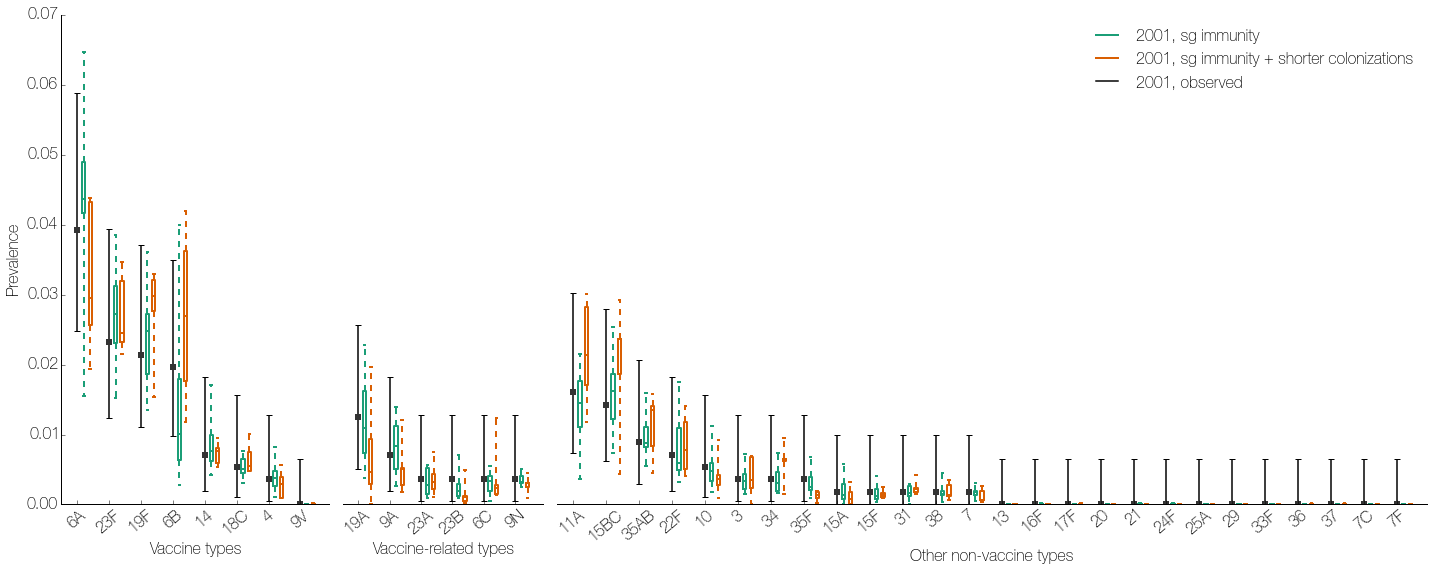

In [30]:
num_in_category = SEROCATEGORIES.value_counts()
width_ratios = [num_in_category['VT'], num_in_category['VRT'], num_in_category['NVT']] 
fig, axes = plt.subplots(1, 3, figsize=(20, 8), gridspec_kw={'width_ratios': width_ratios}, sharey=True)
axes_dict = {'VT': axes[0], 'VRT': axes[1], 'NVT': axes[2]}

for category, group in DF.groupby(by='category'):
  ax = axes_dict[category]
  xs = np.arange(len(group.index))
  
  eb = ax.errorbar(
         xs, group.prev_point_2001, 
         yerr=[group.prev_point_2001 - group.prev_lower_2001, group.prev_upper_2001 - group.prev_point_2001],
         **get_errorbar_style()
       )
  eb[2][0].set_label('2001, observed')

  # option 1: sg and sg + short
  bp = ax.boxplot(group.prev_150_strong_sg, positions=xs + 0.2, **get_boxplot_style(DARK2_COLORS[0]))
  bp['boxes'][0].set_label('2001, sg immunity')
    
  bp = ax.boxplot(group.prev_150_strong_sg_and_short, positions=xs + 0.4, **get_boxplot_style(DARK2_COLORS[1]))
  bp['boxes'][0].set_label('2001, sg immunity + shorter colonizations')
  
  # option 2: short only and weaker sg only
#   bp = ax.boxplot(group.prev_150_short, positions=xs + 0.2, **get_boxplot_style(DARK2_COLORS[2]))
#   bp['boxes'][0].set_label('2001, shorter colonizations')

#   bp = ax.boxplot(group.prev_150_medium_sg, positions=xs + 0.4, **get_boxplot_style(DARK2_COLORS[3]))
#   bp['boxes'][0].set_label('2001, weaker sg immunity') 
        
  ax.set_xlim(-0.5)
  ax.set_ylabel('Prevalence')
  ax.set_xlabel(CATEGORY2LABEL[category])
  ax.xaxis.set_ticks(xs)
  ax.xaxis.set_ticklabels(group.index, rotation=40)

  if ax is axes[0]:
    remove_spines(ax)
  else:
    remove_spines(ax, left=False)
    ax.yaxis.set_visible(False)


axes[2].legend()
    
fig.tight_layout()
save_fig(fig, 'pre-vaccine-fit-all-serotypes-option-{}'.format(1))

### Post-vaccine Fits

In [1]:
num_in_category = SEROCATEGORIES.value_counts()
width_ratios = [num_in_category['VT'], num_in_category['VRT'], num_in_category['NVT']] 
fig, axes = plt.subplots(1, 3, figsize=(20, 8), gridspec_kw={'width_ratios':width_ratios}, sharey=True)
axes_dict = {'VT': axes[0], 'VRT': axes[1], 'NVT': axes[2]}


for category, group in DF.groupby(by='category'):
  ax = axes_dict[category]
  xs = np.arange(len(group.index))
  
  eb = ax.errorbar(
         xs, group.prev_point_2009, 
         yerr=[group.prev_point_2009 - group.prev_lower_2009, group.prev_upper_2009 - group.prev_point_2009],
         **get_errorbar_style()
       )
  eb[2][0].set_label('2009, observed')
  
  
#   # option 1: 2009
  bp = ax.boxplot(group.prev_158_strong_sg, positions=xs + 0.2, **get_boxplot_style(DARK2_COLORS[0]))
  bp['boxes'][0].set_label('2009, sg immunity')
    
  bp = ax.boxplot(group.prev_158_strong_sg_and_short, positions=xs + 0.4, **get_boxplot_style(DARK2_COLORS[1]))
  bp['boxes'][0].set_label('2009, sg immunity + shorter colonizations')
  
#   #  option 2a: 2015
#   bp = ax.boxplot(group.prev_164_strong_sg, positions=xs + 0.2, **get_boxplot_style(DARK2_COLORS[0]))
#   bp['boxes'][0].set_label('2015, sg immunity')
    
#   bp = ax.boxplot(group.prev_164_strong_sg_and_short, positions=xs + 0.4, **get_boxplot_style(DARK2_COLORS[1]))
#   bp['boxes'][0].set_label('2015, sg immunity + shorter colonizations')
  
  # option 2b: 2020
#   bp = ax.boxplot(group.prev_169_strong_sg, positions=xs + 0.2, **get_boxplot_style(DARK2_COLORS[0]))
#   bp['boxes'][0].set_label('2020, sg immunity')
    
#   bp = ax.boxplot(group.prev_169_strong_sg_and_short, positions=xs + 0.4, **get_boxplot_style(DARK2_COLORS[1]))
#   bp['boxes'][0].set_label('2020, sg immunity + shorter colonizations')
  
#   # option 3: short colonizations only (2009 and 2020)
#   bp = ax.boxplot(group.prev_158_strong_sg, positions=xs + 0.2, **get_boxplot_style(DARK2_COLORS[2], alpha=0.5))
#   bp['boxes'][0].set_label('2009, shorter colonizations')
  
#   bp = ax.boxplot(group.prev_169_strong_sg, positions=xs + 0.4, **get_boxplot_style(DARK2_COLORS[2], alpha=1.0))
#   bp['boxes'][0].set_label('2020, shorter colonizations')

#   # option 4: weaker sg only (2009 and 2020)
#   bp = ax.boxplot(group.prev_158_medium_sg, positions=xs + 0.2, **get_boxplot_style(DARK2_COLORS[3], alpha=0.5))
#   bp['boxes'][0].set_label('2009, weaker sg immunity')
  
#   bp = ax.boxplot(group.prev_169_medium_sg, positions=xs + 0.4, **get_boxplot_style(DARK2_COLORS[3], alpha=1.0))
#   bp['boxes'][0].set_label('2020, weaker sg immunity')
      
  for loc, spine in ax.spines.iteritems():
    spine.set_position(('outward', 10))
    
  ax.set_xlim(-0.5)
  ax.set_ylabel('Prevalence')
  ax.set_xlabel(CATEGORY2LABEL[category])
  ax.xaxis.set_ticks(xs)
  ax.xaxis.set_ticklabels(group.index, rotation=40)

  if ax is axes[0]:
    remove_spines(ax)
  else:
    remove_spines(ax, left=False)
    ax.yaxis.set_visible(False)
   


axes[2].legend()
fig.tight_layout()
save_fig(fig, 'post-vaccine-fit-option-{}'.format('2b'))

NameError: name 'SEROCATEGORIES' is not defined

### Only look at VRTs

In [27]:
VRT = DF[DF.category=='VRT']

['possible-poster-figures/post-vaccine-fit-VRT-only-option-4-0.pdf',
 'possible-poster-figures/post-vaccine-fit-VRT-only-option-4-0.png']

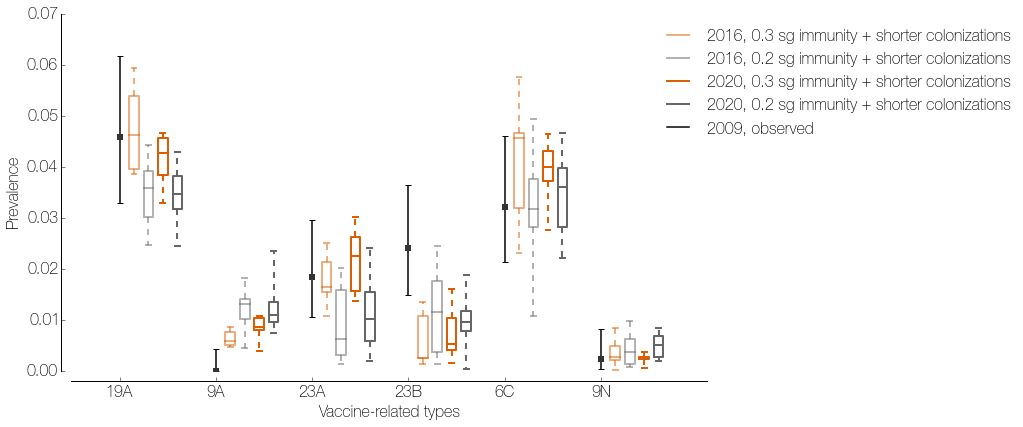

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

group = VRT
xs = np.arange(len(group.index))
  
eb = ax.errorbar(
       xs, group.prev_point_2009, 
       yerr=[group.prev_point_2009 - group.prev_lower_2009, group.prev_upper_2009 - group.prev_point_2009],
       **get_errorbar_style()
     )
eb[2][0].set_label('2009, observed')
  
### option 1: comparison of scenarios
# bp = ax.boxplot(group.prev_158_strong_sg, positions=xs + 0.15, **get_boxplot_style(DARK2_COLORS[0], alpha=0.5))
# bp['boxes'][0].set_label('2009, sg immunity')

# bp = ax.boxplot(group.prev_158_strong_sg_and_short, positions=xs + 0.3, **get_boxplot_style(DARK2_COLORS[1], alpha=0.5))
# bp['boxes'][0].set_label('2009, sg immunity + shorter colonizations')
  
# bp = ax.boxplot(group.prev_169_strong_sg, positions=xs + 0.45, **get_boxplot_style(DARK2_COLORS[0]))
# bp['boxes'][0].set_label('2020, sg immunity')

# bp = ax.boxplot(group.prev_169_strong_sg_and_short, positions=xs + 0.6, **get_boxplot_style(DARK2_COLORS[1]))
# bp['boxes'][0].set_label('2020, sg immunity + shorter colonizations')

## option 2: best scenario through time
# bp = ax.boxplot(group.prev_158_strong_sg_and_short, positions=xs + 0.15, **get_boxplot_style(DARK2_COLORS[1], alpha=0.3))
# bp['boxes'][0].set_label('2009, sg immunity + shorter colonizations')

# bp = ax.boxplot(group.prev_161_strong_sg_and_short, positions=xs + 0.3, **get_boxplot_style(DARK2_COLORS[1], alpha=0.3))
# bp['boxes'][0].set_label('2012, sg immunity + shorter colonizations')

# bp = ax.boxplot(group.prev_163_strong_sg_and_short, positions=xs + 0.45, **get_boxplot_style(DARK2_COLORS[1], alpha=0.3))
# bp['boxes'][0].set_label('2014, sg immunity + shorter colonizations')

# bp = ax.boxplot(group.prev_165_strong_sg_and_short, positions=xs + 0.6, **get_boxplot_style(DARK2_COLORS[1], alpha=1.0))
# bp['boxes'][0].set_label('2016, sg immunity + shorter colonizations')

# bp = ax.boxplot(group.prev_169_strong_sg_and_short, positions=xs + 0.75, **get_boxplot_style(DARK2_COLORS[1], alpha=0.3))
# bp['boxes'][0].set_label('2020, sg immunity + shorter colonizations')

# OPTION 3
# bp = ax.boxplot(group.prev_158_strong_sg_and_short, positions=xs + 0.15, **get_boxplot_style(DARK2_COLORS[1], alpha=0.5))
# bp['boxes'][0].set_label('2009, sg immunity + shorter colonizations')

# bp = ax.boxplot(group.prev_158_short, positions=xs + 0.3, **get_boxplot_style(DARK2_COLORS[2], alpha=0.5))
# bp['boxes'][0].set_label('2009, no immunity + shorter colonizations')
  
# bp = ax.boxplot(group.prev_169_strong_sg_and_short, positions=xs + 0.45, **get_boxplot_style(DARK2_COLORS[1]))
# bp['boxes'][0].set_label('2020, sg immunity + shorter colonizations')

# bp = ax.boxplot(group.prev_169_short, positions=xs + 0.6, **get_boxplot_style(DARK2_COLORS[2]))
# bp['boxes'][0].set_label('2020, no immunity + shorter colonizations')

# OPTION 4
bp = ax.boxplot(group.prev_165_strong_sg_and_short, positions=xs + 0.15, **get_boxplot_style(DARK2_COLORS[1], alpha=0.5))
bp['boxes'][0].set_label('2016, 0.3 sg immunity + shorter colonizations')

bp = ax.boxplot(group.prev_165_medium_sg_and_short, positions=xs + 0.3, **get_boxplot_style(DARK2_COLORS[7], alpha=0.5))
bp['boxes'][0].set_label('2016, 0.2 sg immunity + shorter colonizations')
  
bp = ax.boxplot(group.prev_169_strong_sg_and_short, positions=xs + 0.45, **get_boxplot_style(DARK2_COLORS[1]))
bp['boxes'][0].set_label('2020, 0.3 sg immunity + shorter colonizations')

bp = ax.boxplot(group.prev_169_medium_sg_and_short, positions=xs + 0.6, **get_boxplot_style(DARK2_COLORS[7]))
bp['boxes'][0].set_label('2020, 0.2 sg immunity + shorter colonizations')

ax.set_xlim(-0.5)
ax.set_ylabel('Prevalence')
ax.set_xlabel('Vaccine-related types')
ax.xaxis.set_ticklabels(group.index)
ax.xaxis.set_ticks(xs)

remove_spines(ax)

for loc, spine in ax.spines.iteritems():
  spine.set_position(('outward', 10))

lgd = ax.legend(bbox_to_anchor=(1.5, 1.0))
fig.tight_layout()
save_fig(fig, 'post-vaccine-fit-VRT-only-option-{}'.format(4), bbox_extra_artists=(lgd,), bbox_inches='tight')

### Repeat, but grouping serotypes by VT, VRT, or NVT category

In [42]:
reload(data)

<module 'data_utils' from 'data_utils.pyc'>

In [43]:
df_2001 = data.get_observed_data('{}/configuration/observed_counts_sparc2_2001.json'.format(PROJECT_DIR), SEROTYPES, 2001, get_category)
df_2009 = data.get_observed_data('{}/configuration/observed_counts_sparc2_2009.json'.format(PROJECT_DIR), SEROTYPES, 2009, get_category)
df_obs = df_2001.join(df_2009)

In [44]:
df_sim = DF_SIMULATED
df_sim['category'] = get_category(df_sim.index)
df_sim = df_sim.groupby('category').sum()

In [45]:
DF_3CAT = df_obs.join(df_sim)
DF_3CAT.sort_index(ascending=False, inplace=True)
DF_3CAT.head()

,num_colonized_2001,prev_point_2001,prev_lower_2001,prev_upper_2001,num_colonized_2009,prev_point_2009,prev_lower_2009,prev_upper_2009,prev_145_strong_sg,prev_150_strong_sg,...,prev_160_short,prev_161_short,prev_162_short,prev_163_short,prev_164_short,prev_165_short,prev_166_short,prev_167_short,prev_168_short,prev_169_short
category,,,,,,,,,,,,,,,,,,,,,
VT,67,0.119643,0.093936,0.149441,7,0.008018,0.003230,0.016451,"[0.124270566927, 0.12119763061, 0.132657847176...","[0.131140209949, 0.132113538275, 0.13826339640...",...,"[0.00105666358473, 0.00406123041907, 0.0041491...","[0.0017094017094, 0.00142546836818, 0.00389490...","[0.00270662793768, 0.000412257798543, 0.003665...","[0.00146549427125, 0.00241676785472, 0.0023184...","[0.000858766019289, 0.0019128960363, 0.0036127...","[0.00145118733509, 0.0018144803505, 0.00544547...","[0.0016427914312, 0.00162708878628, 0.00246962...","[0.00264585262601, 0.00257323832146, 0.0021594...","[0.00347632165814, 0.00134138162307, 0.0033154...","[0.00202446923686, 0.000863672601648, 0.002830..."
VRT,19,0.033929,0.020548,0.052478,107,0.122566,0.101542,0.146174,"[0.0454371976838, 0.0301118442232, 0.033432974...","[0.0385241053758, 0.0294407681959, 0.027126359...",...,"[0.0644608638225, 0.0807336992904, 0.068295561...","[0.0616041932939, 0.0667481034483, 0.056245021...","[0.0651130921574, 0.0708281709496, 0.057562422...","[0.0759392086331, 0.0601029854994, 0.057233691...","[0.0872418192628, 0.0725343600694, 0.059379908...","[0.0902594366755, 0.0792285873606, 0.067160918...","[0.0843737455645, 0.0629947097625, 0.072810069...","[0.076509228734, 0.0581397730272, 0.0714129734...","[0.0621146307228, 0.0613234862508, 0.066494333...","[0.057356301822, 0.0638231769864, 0.0628756996..."
NVT,40,0.071429,0.051517,0.095998,139,0.159221,0.135560,0.185207,"[0.0744343913278, 0.0621675023871, 0.066201517...","[0.0659601287777, 0.0542400901386, 0.068054596...",...,"[0.143701843878, 0.120453402062, 0.13250787671...","[0.124852052597, 0.114286346728, 0.13737784790...","[0.121776247689, 0.116611661399, 0.13858523860...","[0.124300532907, 0.130866838325, 0.13930840222...","[0.140991760206, 0.148027031896, 0.14536254072...","[0.147999105541, 0.167496401089, 0.13852073087...","[0.143448520568, 0.150813521504, 0.16311520456...","[0.125766168805, 0.135116974136, 0.16291495223...","[0.130001286895, 0.134518179745, 0.14207341709...","[0.142229973594, 0.133957802684, 0.13516297485..."


['possible-poster-figures/pre-vaccine-fit-3cat-1.pdf',
 'possible-poster-figures/pre-vaccine-fit-3cat-1.png']

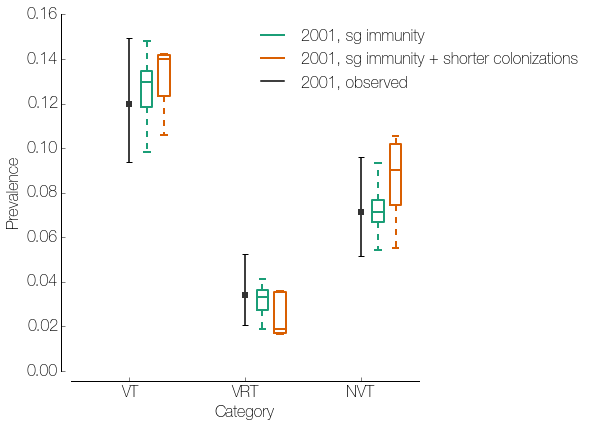

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

xs = np.arange(len(DF_3CAT.index))
eb = ax.errorbar(
       xs, DF_3CAT.prev_point_2001, 
       yerr=[DF_3CAT.prev_point_2001 - DF_3CAT.prev_lower_2001, DF_3CAT.prev_upper_2001 - DF_3CAT.prev_point_2001],
       **get_errorbar_style()
     )
eb[2][0].set_label('2001, observed')

bp = ax.boxplot(DF_3CAT.prev_150_strong_sg, positions=xs + 0.15, **get_boxplot_style(DARK2_COLORS[0], alpha=1.0))
bp['boxes'][0].set_label('2001, sg immunity')

bp = ax.boxplot(DF_3CAT.prev_150_strong_sg_and_short, positions=xs + 0.3, **get_boxplot_style(DARK2_COLORS[1], alpha=1.0))
bp['boxes'][0].set_label('2001, sg immunity + shorter colonizations')
  
ax.set_xlim(-0.5, max(xs) + 0.5)
ax.set_ylabel('Prevalence')
ax.set_xlabel('Category')
ax.xaxis.set_ticklabels(DF_3CAT.index)
ax.xaxis.set_ticks(xs)
remove_spines(ax)

for loc, spine in ax.spines.iteritems():
  spine.set_position(('outward', 10))

lgd = ax.legend(bbox_to_anchor=(1.5, 1))
    
fig.tight_layout()
save_fig(fig, 'pre-vaccine-fit-3cat', bbox_extra_artists=(lgd,), bbox_inches='tight')

['possible-poster-figures/post-vaccine-fit-3cat-option-1-0.pdf',
 'possible-poster-figures/post-vaccine-fit-3cat-option-1-0.png']

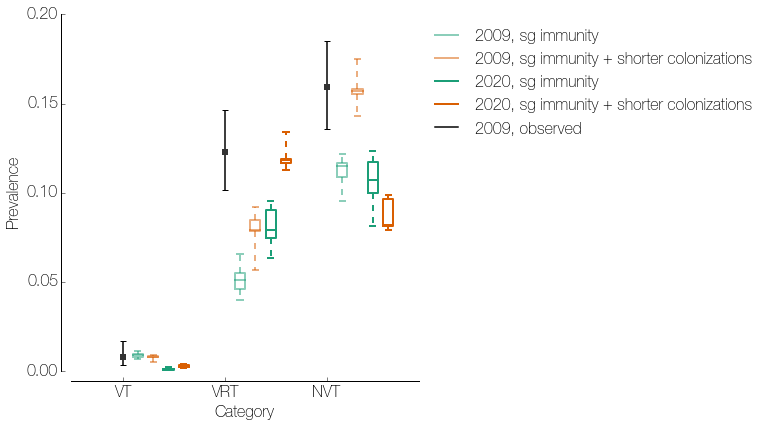

In [49]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

xs = np.arange(len(DF_3CAT.index))
eb = ax.errorbar(
       xs, DF_3CAT.prev_point_2009, 
       yerr=[DF_3CAT.prev_point_2009 - DF_3CAT.prev_lower_2009, DF_3CAT.prev_upper_2009 - DF_3CAT.prev_point_2009],
       **get_errorbar_style()
     )
eb[2][0].set_label('2009, observed')

### OPTION 1: comparison of scenarios
bp = ax.boxplot(DF_3CAT.prev_158_strong_sg, positions=xs + 0.15, **get_boxplot_style(DARK2_COLORS[0], alpha=0.5))
bp['boxes'][0].set_label('2009, sg immunity')

bp = ax.boxplot(DF_3CAT.prev_158_strong_sg_and_short, positions=xs + 0.3, **get_boxplot_style(DARK2_COLORS[1], alpha=0.5))
bp['boxes'][0].set_label('2009, sg immunity + shorter colonizations')
  
bp = ax.boxplot(DF_3CAT.prev_169_strong_sg, positions=xs + 0.45, **get_boxplot_style(DARK2_COLORS[0]))
bp['boxes'][0].set_label('2020, sg immunity')

bp = ax.boxplot(DF_3CAT.prev_169_strong_sg_and_short, positions=xs + 0.6, **get_boxplot_style(DARK2_COLORS[1]))
bp['boxes'][0].set_label('2020, sg immunity + shorter colonizations')


### OPTION 2: best scenario through time
# bp = ax.boxplot(DF_3CAT.prev_158_strong_sg_and_short, positions=xs + 0.15, **get_boxplot_style(DARK2_COLORS[2], alpha=0.5))
# bp['boxes'][0].set_label('2009, sg immunity + short colonizations')

# bp = ax.boxplot(DF_3CAT.prev_161_strong_sg_and_short, positions=xs + 0.3, **get_boxplot_style(DARK2_COLORS[2], alpha=0.6))
# bp['boxes'][0].set_label('2012, sg immunity + short colonizations')

# bp = ax.boxplot(DF_3CAT.prev_162_strong_sg_and_short, positions=xs + 0.45, **get_boxplot_style(DARK2_COLORS[2], alpha=0.7))
# bp['boxes'][0].set_label('2013, sg immunity + short colonizations')

# bp = ax.boxplot(DF_3CAT.prev_163_strong_sg_and_short, positions=xs + 0.6, **get_boxplot_style(DARK2_COLORS[2], alpha=0.8))
# bp['boxes'][0].set_label('2014, sg immunity + short colonizations')

# bp = ax.boxplot(DF_3CAT.prev_164_strong_sg_and_short, positions=xs + 0.75, **get_boxplot_style(DARK2_COLORS[2], alpha=1.0))
# bp['boxes'][0].set_label('2015, sg immunity + short colonizations')

ax.set_xlim(-0.5, max(xs) + 0.9)
ax.set_ylabel('Prevalence')
ax.set_xlabel('Category')
ax.xaxis.set_ticklabels(DF_3CAT.index)
ax.xaxis.set_ticks(xs)
remove_spines(ax)

for loc, spine in ax.spines.iteritems():
  spine.set_position(('outward', 10))

lgd = ax.legend(bbox_to_anchor=(2.0, 1))
    
fig.tight_layout()
save_fig(fig, 'post-vaccine-fit-3cat-option-{}'.format(1), bbox_extra_artists=(lgd,), bbox_inches='tight')

### Trajectory of Observed Data

In [889]:
dfs = []
OBS_YEARS = (2001, 2004, 2007, 2009, 2011, 2014)
for yr in OBS_YEARS:
  d = data.get_observed_data('{}/scripts/outputs/observed_counts_sparc2_{}.json'.format(PROJECT_DIR, yr), SEROTYPES, yr, get_category)
  dfs.append(d)
DF_OBS_ALL = dfs[0].join(dfs[1:])
DF_OBS_ALL.head()

,num_colonized_2001,prev_point_2001,prev_lower_2001,prev_upper_2001,num_colonized_2004,prev_point_2004,prev_lower_2004,prev_upper_2004,num_colonized_2007,prev_point_2007,...,prev_lower_2009,prev_upper_2009,num_colonized_2011,prev_point_2011,prev_lower_2011,prev_upper_2011,num_colonized_2014,prev_point_2014,prev_lower_2014,prev_upper_2014
category,,,,,,,,,,,,,,,,,,,,,
NVT,40,0.071429,0.051517,0.095998,96,0.118519,0.097063,0.142794,144,0.173494,...,0.135560,0.185207,205,0.230596,0.203275,0.259715,210,0.241379,0.213285,0.271237
VRT,19,0.033929,0.020548,0.052478,46,0.056790,0.041874,0.075027,103,0.124096,...,0.101542,0.146174,100,0.112486,0.092465,0.135115,74,0.085057,0.067377,0.105606
VT,67,0.119643,0.093936,0.149441,41,0.050617,0.036565,0.068044,16,0.019277,...,0.003230,0.016451,6,0.006749,0.002481,0.014632,2,0.002299,0.000279,0.008279


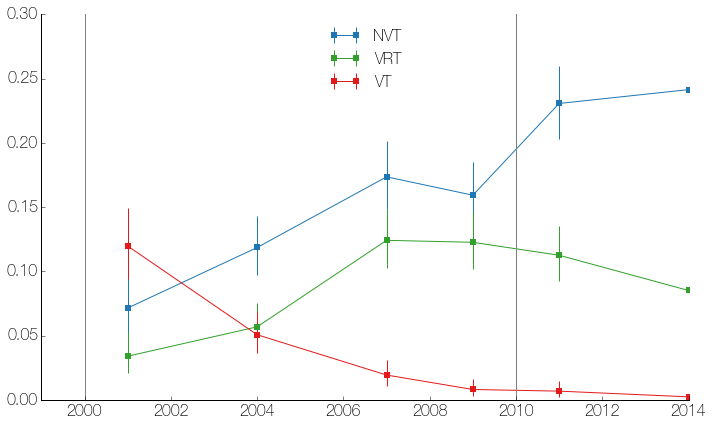

In [691]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
for i, cat in enumerate(DF_OBS_ALL.index):
  x = OBS_YEARS
  y = np.array([DF_OBS_ALL['prev_point_{}'.format(yr)][cat] for yr in OBS_YEARS])
  y_hi = np.array([DF_OBS_ALL['prev_upper_{}'.format(yr)][cat] for yr in OBS_YEARS])
  y_lo = np.array([DF_OBS_ALL['prev_lower_{}'.format(yr)][cat] for yr in OBS_YEARS])
  
  ax.errorbar(x, y, yerr=[y - y_lo, y_hi - y], label=cat, color=PAIRED12_COLORS[i*2 + 1], marker='s')

ax.axvline(x=2000, c='.5')
ax.axvline(x=2010, c='.5')
ax.set_xlim(1999)
ax.legend(loc='best')
remove_spines(ax)
fig.tight_layout()